In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
sns.set(
)
np.random.seed(42)

In [2]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [4]:
#Control Group CTR
control = df.query('group == "control"')
control_ctr = control.query('completed == True').id.nunique() / control.id.nunique()

#Experiment Group CTR
experiment = df.query('group == "experiment"')
experiment_ctr = experiment.query('completed == True').id.nunique() / experiment.id.nunique()

#Observed Differences
obs_diff = experiment_ctr - control_ctr

print(' Control Group CTR: {:.4f}\n\n Experiment Group CTR: {:.4f}\n\n Observed Difference: {:.4f}'\
     .format(control_ctr, experiment_ctr, obs_diff))

 Control Group CTR: 0.3720

 Experiment Group CTR: 0.3935

 Observed Difference: 0.0215


In [5]:
bt_samples = []
size = df.shape[0]
for i in range(10000):
    sample = df.sample(size, replace=True)
    control_sample = sample.query('group == "control"')
    control_sample_ctr = control_sample.query('completed == True').id.nunique() / control_sample.id.nunique()
    
    experiment_sample = sample.query('group == "experiment"')
    experiment_sample_ctr = experiment_sample.query('completed == True').id.nunique() / experiment_sample.id.nunique()
    
    bt_samples.append(experiment_sample_ctr - control_sample_ctr)
    

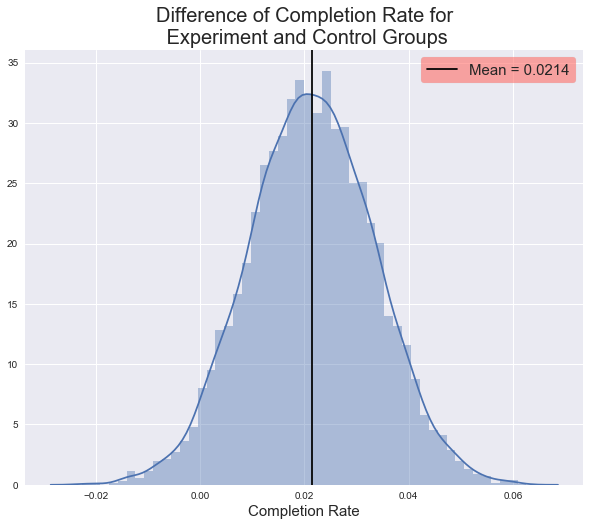

In [14]:
plt.figure(figsize=(10, 8))
sns.distplot(bt_samples)
plt.xlabel('Completion Rate', fontsize=15)
plt.title('Difference of Completion Rate for\n Experiment and Control Groups', fontsize=20)
plt.axvline(np.mean(bt_samples), linestyle='-', color='k', label='Mean = {:.4f}'.format(np.mean(bt_samples)))
plt.legend(frameon=True, fontsize=15, framealpha=0.6, facecolor='#ff6f69');

In [32]:
null_vals = np.random.normal(0, np.std(bt_samples), size=len(bt_samples))

#p-value
p = (null_vals > obs_diff).mean()

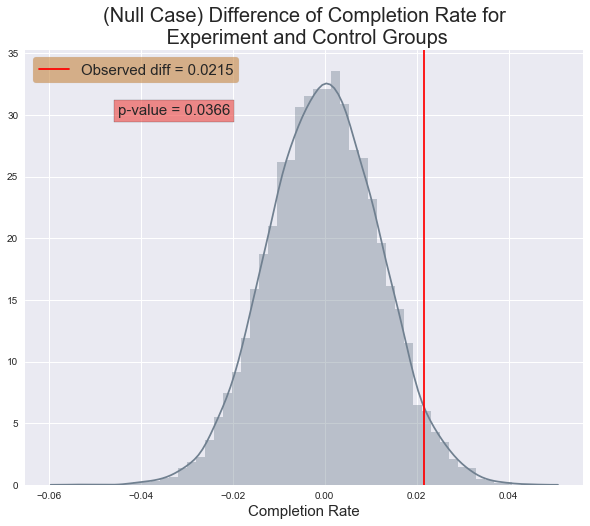

In [33]:
plt.figure(figsize=(10, 8))
sns.distplot(null_vals, color='#708090')
plt.xlabel('Completion Rate', fontsize=15)
plt.title('(Null Case) Difference of Completion Rate for\n Experiment and Control Groups', fontsize=20)
plt.axvline(obs_diff, linestyle='-', color='r', label='Observed diff = {:.4f}'.format(obs_diff))
plt.legend(frameon=True, fontsize=15, framealpha=0.6, facecolor='#c68642')
plt.text(-0.045, 30, s='p-value = {:.4f}'.format(p), fontsize=15, bbox=dict(facecolor='#EE4540', alpha=0.6));


In [39]:
0.05 / 4

0.0125